## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 8
---------------------------------------

GOALS:

1. Load data into Python that you find online
2. Understand data types and fix some errors
3. Find your own data to play with

----------------------------------------------------------

This homework has **5 questions** and **1 problem**.

NOTE: Be kind to yourself. Working with data can be hard! Every data set is different. **Seriously** come get help! Come to lab!


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Try reading in some data - csv

Go to the [Cal Fire Website](https://www.fire.ca.gov/incidents) and scroll to the bottom to see the Incident Data. We will download the file named **ALL DATA AS CSV** this should put the data file into your Downloads folder. 

Next you need to move the file **mapdataall.csv** from your Downloads folder into your Day8 folder where you are doing your homework. You can open your Downloads folder and drag the file into JupyterLab side bar. Then I can run the command

    DF_raw = pd.read_csv('mapdataall.csv')

to load the data and look at the data frame.

In [76]:
# Your code here
DF_raw = pd.read_csv('mapdataall.csv')

DF_raw.shape

(2727, 23)

In [78]:
list(DF_raw.columns)

['incident_name',
 'incident_is_final',
 'incident_date_last_update',
 'incident_date_created',
 'incident_administrative_unit',
 'incident_administrative_unit_url',
 'incident_county',
 'incident_location',
 'incident_acres_burned',
 'incident_containment',
 'incident_control',
 'incident_cooperating_agencies',
 'incident_longitude',
 'incident_latitude',
 'incident_type',
 'incident_id',
 'incident_url',
 'incident_date_extinguished',
 'incident_dateonly_extinguished',
 'incident_dateonly_created',
 'is_active',
 'calfire_incident',
 'notification_desired']

In [80]:
DF_raw['incident_type'].drop_duplicates()
DF_raw[['incident_date_created','incident_dateonly_created']]
DF_raw['year'] = DF_raw['incident_dateonly_created']

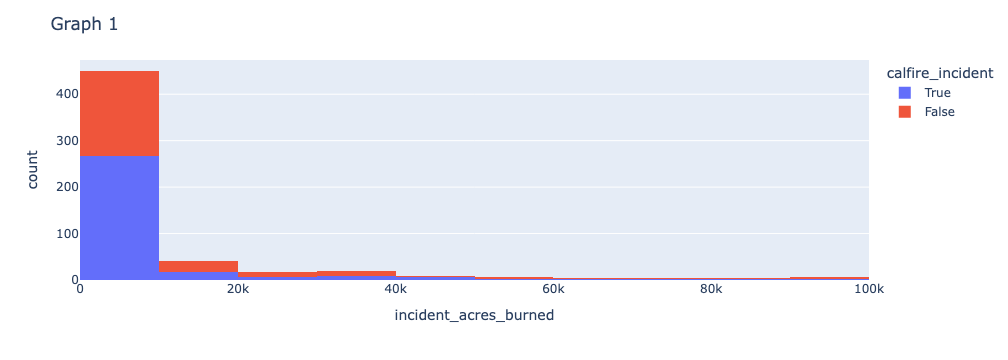

In [82]:
focus = (DF_raw['incident_acres_burned'] >= 500) & (DF_raw['incident_acres_burned'] <= 100000)
fire = px.histogram(DF_raw[focus],
                    x = 'incident_acres_burned',
                    color = 'calfire_incident',
                   nbins = 10)
fire.update_layout(title = 'Graph 1')
fire.show()

In [118]:
DF_raw['year'] = DF_raw['incident_dateonly_created'].apply(lambda x: x.split('-')[0])
DF_raw['year']                                                        

0       2017
1       2009
2       2013
3       2013
4       2013
        ... 
2722    2024
2723    2024
2724    2024
2725    2024
2726    2024
Name: year, Length: 2727, dtype: object

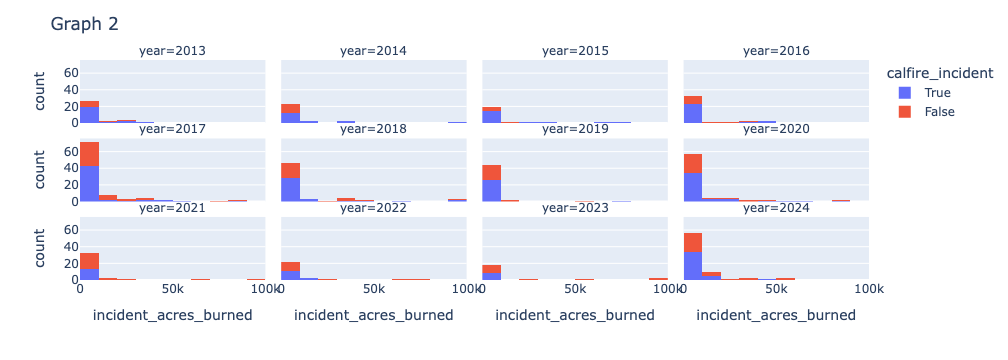

In [124]:
time = px.histogram(DF_raw[focus],
                    x = 'incident_acres_burned',
                    color = 'calfire_incident',
                    facet_col = 'year',
                    facet_col_wrap= 4,
                   nbins = 15)
time.update_layout(title = 'Graph 2')
time.show()

**Q1** How many variables and observations?

2727 observations, 23 variables

**Q2** How many different incident types are there?

3
 
**Q3** Make a histogram of the acres burned and color the bars by whether or not the incident was a calfire incident. You will probably need to make a mask to remove very small and very large fires. How many fires burned more than 100,000 acres? What is the largest fire in the data?

See Graph 1. Excludes fires over 100,000 acres of which there were 20, and fires under 500 acres. The biggest fire in the data set was the August Complex iwth a total of 1032648 acres. 

**Extra Q** EXTRA - CHALLENGE - See if you can create a graph that answers the question: Are fires getting bigger or more frequent over time? You get complete creative control on how to answer this question!

Number of fires seems relatively consistent though this year is picking back up after a few years with less fires. 

In [114]:
# You will need to write some code to answer the questions.
mask = (DF_raw['incident_acres_burned'] == DF_raw['incident_acres_burned'].max())
DF_raw[mask]

,incident_name,incident_is_final,incident_date_last_update,incident_date_created,incident_administrative_unit,incident_administrative_unit_url,incident_county,incident_location,incident_acres_burned,incident_containment,...,incident_type,incident_id,incident_url,incident_date_extinguished,incident_dateonly_extinguished,incident_dateonly_created,is_active,calfire_incident,notification_desired,year
1653,August Complex (includes Doe Fire),Y,2020-11-18T10:22:42Z,2020-08-16T20:37:26Z,Mendocino National Forest,NaN,"Mendocino, Humboldt, Trinity, Tehama, Glenn, L...","Mendocino, Humboldt, Trinity, Tehama, Glenn, ...",1032648.0,100.0,...,Wildfire,b8f267be-9911-44ee-8a73-7a0537fbd6fa,https://www.fire.ca.gov/incidents/2020/8/16/au...,2020-11-11T10:21:44Z,2020-11-11,2020-08-16,N,False,False,2020-08-16


## Try reading in some data from Wikipedia - html

Here we will explore academy award winning films. Go to the [Wiki for the List of Academy Award Winning Films](https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films). Look at what type of data is there. How many tables? Any weird looking data?

Now read the html data into Python and show the data in DF[0]

In [4]:
# Your code here


In [127]:
# Here is some helper code
# This is code that will read in the data and then fix the Year column
my_website = "https://en.wikipedia.org/wiki/List_of_Academy_Award%E2%80%93winning_films"
DF = pd.read_html(my_website)
DF_raw = DF[0]
DF_raw['Year'] = DF_raw['Year'].apply(lambda x: int(x.split('/')[0]))
DF_raw['Year'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})

,Year,count
0,1945,21
1,1949,20
2,1942,20
3,1948,19
4,1941,19
...,...,...
91,1931,10
92,1932,9
93,1928,7
94,1930,6


**Q4** Following along with the lecture notes or video, fix the data in the 'Awards' column.

In [145]:
# Your code here
DF_raw['Awards'].drop_duplicates()

0        7
1        4
2        2
3        1
26       3
27       6
102      0
177      5
219      8
296     11
389      9
1341    10
Name: Awards, dtype: int64

**Q5** Now try to fix the data in the "Nominations" column - see if you can do it without looking at the answer.

In [149]:
# Your code here
DF_raw['Nominations'] = DF_raw['Nominations'].apply(lambda x: int(x.split('[')[0]))
DF_raw['Nominations'].drop_duplicates()

0      13
1      11
2       5
5       8
6       1
14      9
15      3
16      6
18      4
19      2
27     10
36      7
38     12
102     0
104    14
Name: Nominations, dtype: int64

## Problem 1

Your homework today will be to see if you can find some data of your own. This can be the first steps you take toward your final project. 

You should:

* Find some data online
* Read that data into Python using the Pandas commands we learned
* Look at the DataFrame - number of variables, number of observations, AND the dtypes. Comment on what you see.
* Try to do summary statistics (.describe()). Does it work like expected?
* Attempt to fix any data, or explain why the data does not need to be fixed.
* Make some sort of graph using columns in your data.

In [158]:
DF_rush = pd.read_csv('rushing.csv')
DF_rush['RushYds'] = DF_rush['Rush Yds']
DF_rush.describe()

,Rush Yds,Att,TD,20+,40+,Lng,Rush 1st,Rush 1st%,Rush FUM,RushYds
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,76.318408,17.208955,0.626866,0.442786,0.069652,14.034826,4.417910,28.829851,0.223881,76.318408
std,99.332865,20.905648,1.097759,0.973632,0.324229,13.179294,5.451099,26.863399,0.595506,99.332865
min,-10.000000,1.000000,0.000000,0.000000,0.000000,-10.000000,0.000000,0.000000,0.000000,-10.000000
25%,7.000000,2.000000,0.000000,0.000000,0.000000,6.000000,1.000000,6.100000,0.000000,7.000000
50%,28.000000,8.000000,0.000000,0.000000,0.000000,11.000000,2.000000,25.000000,0.000000,28.000000
75%,113.000000,26.000000,1.000000,0.000000,0.000000,18.000000,6.000000,39.100000,0.000000,113.000000
max,480.000000,91.000000,5.000000,6.000000,3.000000,87.000000,25.000000,100.000000,4.000000,480.000000


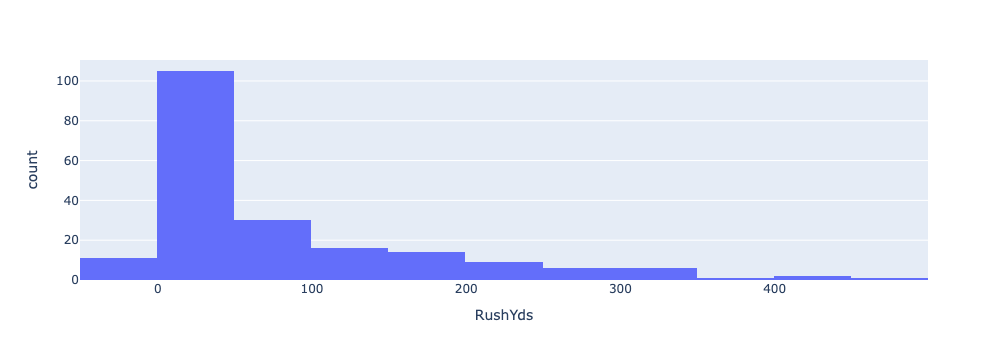

In [164]:
run = px.histogram(DF_rush,
                   x = 'RushYds')
run.show()